In [1]:
import matplotlib.pyplot as plt
import numpy as np

import nunes
import nunes.nn as nn
import nunes.optimizers as nuoptims

### Construct a toy dataset

/var/folders/tc/dlyns3k11z39mt829nl7nqx80000gp/T/ipykernel_46000/11446935.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.where(x >= 0, (x ** 0.5) * np.sin(x), np.cos(x))


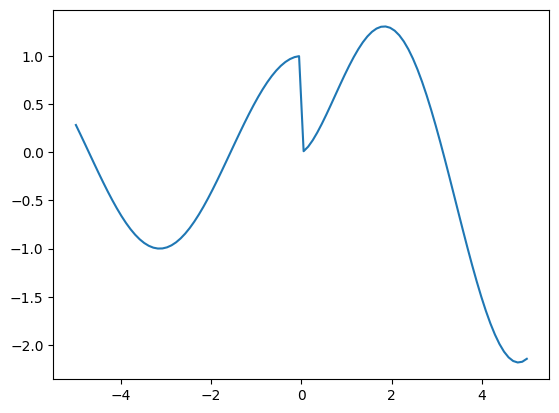

In [2]:
def y(x):
    return np.where(x >= 0, (x ** 0.5) * np.sin(x), np.cos(x))

xn = np.linspace(-5, 5, 100).reshape(-1, 1)
yn = y(xn)

plt.plot(xn, yn)

### Define custom regressor neural network

In [3]:
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 16)
        self.ac1 = nn.LeakyReLU(slope=1e-2)
        self.fc2 = nn.Linear(16, 64)
        self.ac2 = nn.LeakyReLU(slope=1e-1)
        self.fc3 = nn.Linear(64, 32)
        self.ac3 = nn.Sigmoid()
        self.fc4 = nn.Linear(32, 2)

    def forward(self, x: nunes.Tensor) -> nunes.Tensor:
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        x = self.ac2(x)
        x = self.fc3(x)
        x = self.ac3(x)
        x = self.fc4(x)

        x = x[:, 0] + x[:, 1]

        return x

In [4]:
model = Regressor()
optimizer = nuoptims.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

In [5]:
model

Regressor(
	(fc1): Linear(in_features=1, out_features=16, bias=True)
	(ac1): LeakyReLU(slope=0.01)
	(fc2): Linear(in_features=16, out_features=64, bias=True)
	(ac2): LeakyReLU(slope=0.1)
	(fc3): Linear(in_features=64, out_features=32, bias=True)
	(ac3): Sigmoid()
	(fc4): Linear(in_features=32, out_features=2, bias=True)
)

### Train loop

In [6]:
for e in range(10_000):
    preds = model(nunes.tensor(xn)).reshape((-1, 1))
    truth = nunes.tensor(yn)

    loss = criterion(preds, truth)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

### Validate results

/var/folders/tc/dlyns3k11z39mt829nl7nqx80000gp/T/ipykernel_46000/11446935.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.where(x >= 0, (x ** 0.5) * np.sin(x), np.cos(x))


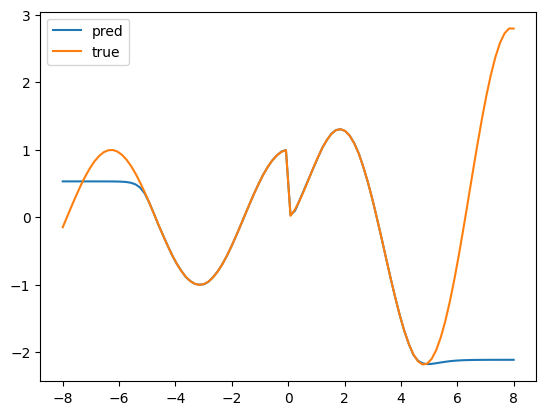

In [7]:
test_xn = np.linspace(-8, 8, 100).reshape(-1, 1)
test_yn = y(test_xn)

yhat = model(nunes.tensor(test_xn)).numpy()

plt.plot(test_xn, yhat, label="pred")
plt.plot(test_xn, test_yn, label="true")
plt.legend()